#                            Data Analysis Report on H-1B Visa

In [106]:
# Importing the useful Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['font.size'] = 15

In [150]:
# Reading the H-1B Dataset.

try:
    df = pd.read_csv('input/h1b_kaggle.csv')
except Exception as e :
    df = pd.read_csv('../input/h1b_kaggle.csv')
    
# Take a look at the First Five rows.

df.head()    

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [30]:
# Now Let's see the shape of the Dataset.

print(f'The Number of Rows are-->>\t {df.shape[0]}')
print(f'The Number of Columns are-->>\t {df.shape[1]}')

The Number of Rows are-->>	 3002458
The Number of Columns are-->>	 8


In [151]:
# Removing the unwanted columns.

df.drop(['Unnamed: 0','lon','lat'],axis=1, inplace=True)

# Top 5 enties after removing the unwanted columns.
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [149]:
# Checking whether missing data will effect our Analysis or not.

print(f'The Shape of Dataset With Missing Values is->\t {df.shape}')
print()
q = df.dropna()
print(f'The Shape of Dataset Without Missing Values is->\t {q.shape}')
print()
print("""So as One can see missing values will not effect our Analysis as we have 30 million entries.
Hence no need to remove missing values.""")

The Shape of Dataset With Missing Values is->	 (3002458, 8)

The Shape of Dataset Without Missing Values is->	 (2984609, 8)

So as One can see missing values will not effect our Analysis as we have 30 million entries.
Hence no need to remove missing values.


#### =========================================================================================================

### Q1). Analysis the number of applications year wise.  And applicants growth rate per year.

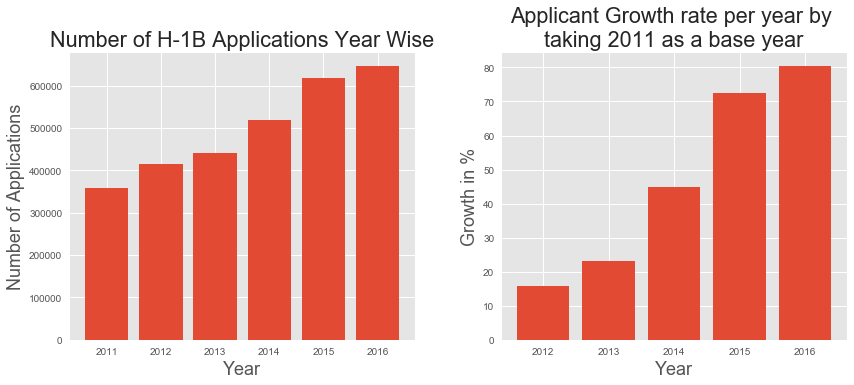

In [109]:
# Number of applications per year.

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_axes([0,0,.4,.4])
ax2 = fig.add_axes([.5,0,.4,.4])

year = df['YEAR'].value_counts()
ax1.bar(x=year.index, height=year[:])
ax1.set_title('Number of H-1B Applications Year Wise')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Applications')

#Applications growth rate per year by taking 2011 as a base year.

q = pd.Series(data=[358767 for i in range(6)])
temp_year = year[:5]
temp_year.index = [0,1,2,3,4,5]
temp_year = ((((temp_year-q)[:5])/(q[:5]))*100)
temp_year.index = [2016,2015,2014,2013,2012]
ax2.bar(x=temp_year.index, height=temp_year[:])
ax2.set_title("""Applicant Growth rate per year by 
taking 2011 as a base year""")
ax2.set_xlabel('Year')
ax2.set_ylabel('Growth in %')
plt.show()

#### The conclusion from the figures:-
* As from the figure-1 we can say that the number of applicants are increasing year over year from 2011 to 2016.
* As the number of applications are approximately double in 2016 as compare to 2011.
* It indicates that Foriegner loves to work in America as compare to previous year.
* From figure-2 one can say that the growth is tremendous after 2014 and specially in 2016 which gives us approximately 
  80% growth


##### ==========================================================================================================

### Q2). Summary of Applicants according to Case status.

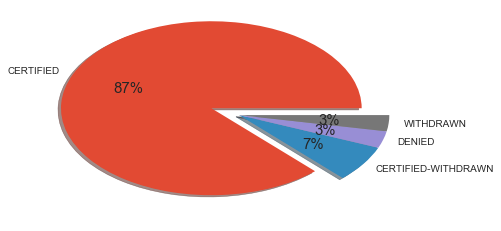

In [120]:
# Analysing the case status and Ploting the result.

status = df['CASE_STATUS'].value_counts()
#print(status)
plt.pie(labels=status.index[:-3], x=status[:-3], explode=[0.2,0,0,0], autopct='%.f%%', shadow=True)
plt.show()

#### The conclusions from the Figure:-
* We can say that the one who apply for the H-1B visa, gets its visa. As 87% get it certified.
* It is easy to get H-1B certification, we can say from the data.


#### =====================================================================================================
#### =====================================================================================================

### Q3). What are the most top 10 desirable Job Titles and thier average salary?

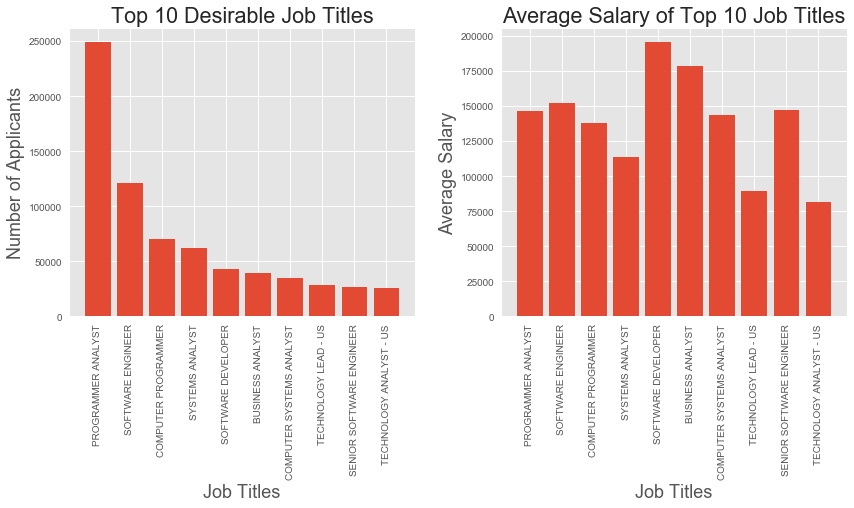

In [153]:
# Top 10 desirable job titles.

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_axes([0,0,.4,.4])
ax2 = fig.add_axes([.5,0,.4,.4])
job_title = df['JOB_TITLE'].value_counts()[:10]

ax1.bar(x=job_title.index, height=job_title[:])
ax1.set_xticklabels(labels=job_title.index , rotation=90)
ax1.set_title('Top 10 Desirable Job Titles')
ax1.set_xlabel('Job Titles')
ax1.set_ylabel('Number of Applicants')

# Average Salary of top 10 desirable Job Title.

job_title_avg = []
for i in job_title.index:
    avg = df[df['JOB_TITLE']==i]['PREVAILING_WAGE'].mean()
    job_title_avg.append(avg)
    
ax2.bar(x=job_title.index, height=job_title_avg)  
ax2.set_xticklabels(labels=job_title.index, rotation=90)
ax2.set_title('Average Salary of Top 10 Job Titles')
ax2.set_xlabel('Job Titles')
ax2.set_ylabel('Average Salary')
plt.show()

#### The conclusions from the figures:-
* Programmer analyst, software engineer, computer programmer, systems analyst they are in high demand from foreigner in America.
* As all the job titles are belongs to IT field, so IT field is in demand in America.
* But from the salary point of view Business analyst, software developer , they are getting high salary than those who are in high demnad.


#### ==================================================================================================

### Q4). Top 20 Company who sent highest H-1B visa applications.

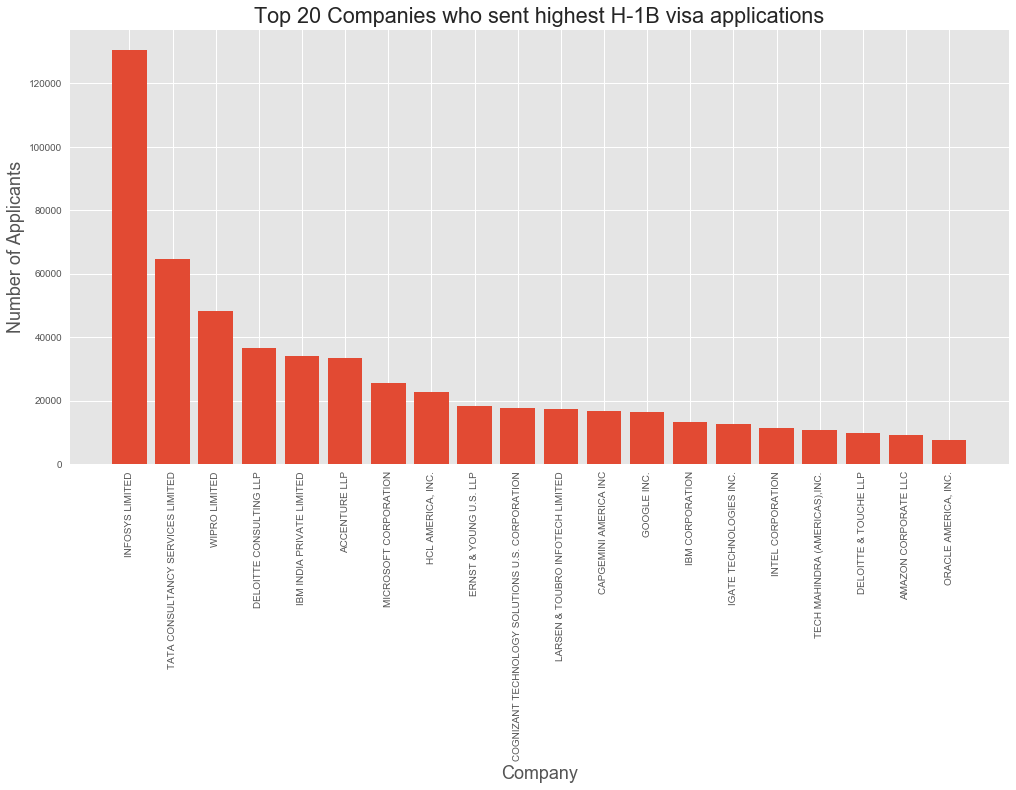

In [161]:
# Ploting companies who sent highgest H-1B visa applications

company = df['EMPLOYER_NAME'].value_counts()[:20]
plt.figure(figsize=(15,8))
plt.bar(x=company.index, height=company[:])
plt.title('Top 20 Companies who sent highest H-1B visa applications')
plt.xlabel('Company')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=90)
plt.show()

#### The conclusions from the figure:-
* Infosys, TCS, Wipro, Deloitte, accenture, IBM they are in high demands.

#### ====================================================================================================

### Q5). Comparision between the average salary of top 10 companies who are in demand AND top 10 companies who are paying highest salary.

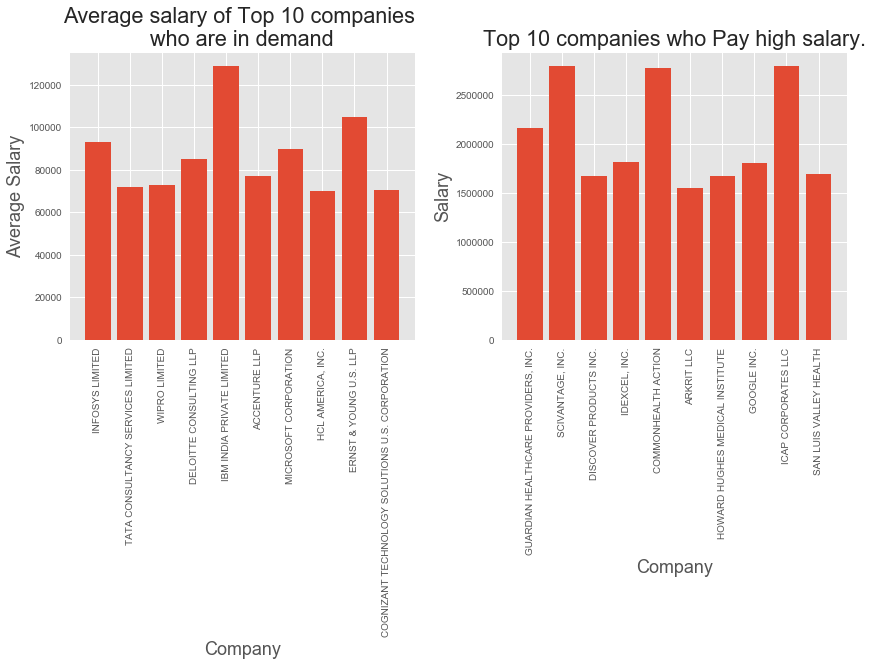

In [187]:
# Average salary of top 10 companies who are in demand.

company_demand = df['EMPLOYER_NAME'].value_counts()[:10]

company_demand_avg = []
for var in company_demand.index:
    avg = df[df['EMPLOYER_NAME']==var]['PREVAILING_WAGE'].mean()
    company_demand_avg.append(avg)
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_axes([0,0,.4,.4])

ax1.bar(x=company_demand.index, height=company_demand_avg[:])
ax1.set_xticklabels(labels=company_demand.index, rotation=90)
ax1.set_title("""Average salary of Top 10 companies 
who are in demand""")
ax1.set_xlabel('Company')
ax1.set_ylabel('Average Salary')

# Top 10 companies who are paying highest salary

company_highsalary = df.sort_values(by='PREVAILING_WAGE', ascending=False)['EMPLOYER_NAME'][:10]

ax2 = fig.add_axes([.5,0,.4,.4])
ax2.bar(x=company_highsalary.values, height=company_highsalary.index)

ax2.set_xticklabels(labels=company_highsalary.values, rotation=90)
ax2.set_title('Top 10 companies who Pay high salary.')
ax2.set_xlabel('Company')
ax2.set_ylabel('Salary')

plt.show()

#### The conclusions from the figure:-
* The top 10 companies who are paying highest salary are totaly different from the average salary of top 10 companies who are in high demand.
* The highest salaries are double of the average salaries.
* Top 10 companies who are in demand they are hireing in bulk but they are paying less salary. On the other hand those top 10 companies who pay highest salary they hire less employees but they pay them very well and high. 

#### ====================================================================================================